<a href="https://colab.research.google.com/github/pp1506-lgtm/Basic-EDA/blob/main/FDSProjectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving train_revised.csv to train_revised (2).csv
Dataset Loaded Successfully
Shape: (51645, 10)

First 5 Rows


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49



Column Data Types
ride_id             int64
seat_number        object
payment_method     object
payment_receipt    object
travel_date        object
travel_time        object
travel_from        object
travel_to          object
car_type           object
max_capacity        int64
dtype: object

Missing Values
ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

Missing Percentage (%):
ride_id            0.0
seat_number        0.0
payment_method     0.0
payment_receipt    0.0
travel_date        0.0
travel_time        0.0
travel_from        0.0
travel_to          0.0
car_type           0.0
max_capacity       0.0
dtype: float64

Duplicate rows: 0

Numeric Columns: ['ride_id', 'max_capacity']
Categorical Columns: ['seat_number', 'payment_method', 'payment_receipt', 'travel_date', 'travel_time', 'travel_from', 'travel_to', '

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000



Outlier Detection (IQR Method)
ride_id: 45 outliers (0.09%)
max_capacity: 0 outliers (0.00%)


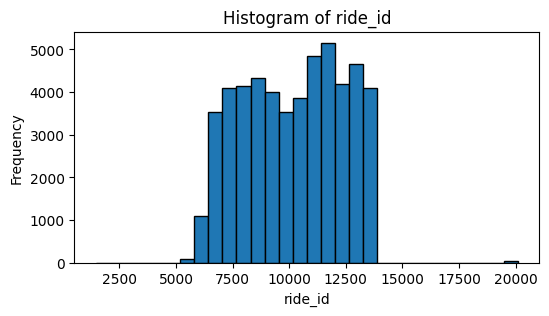

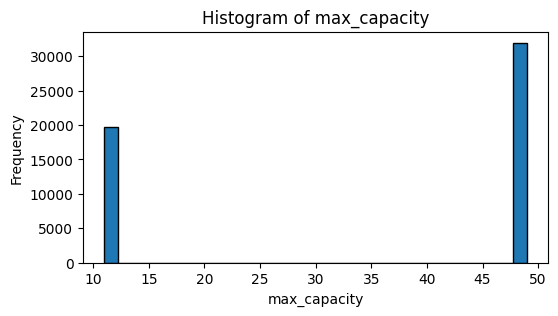

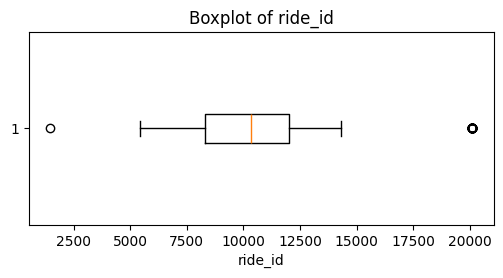

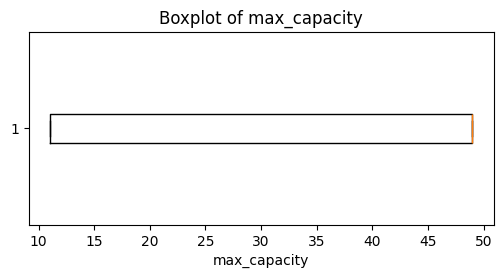

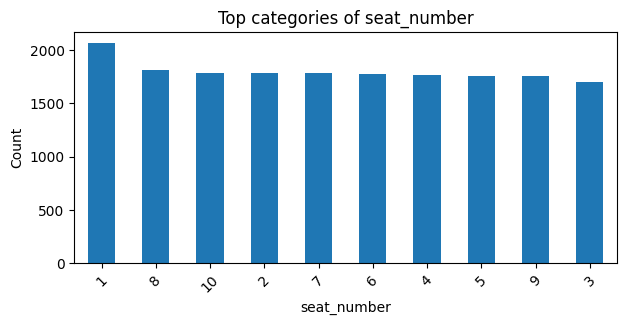

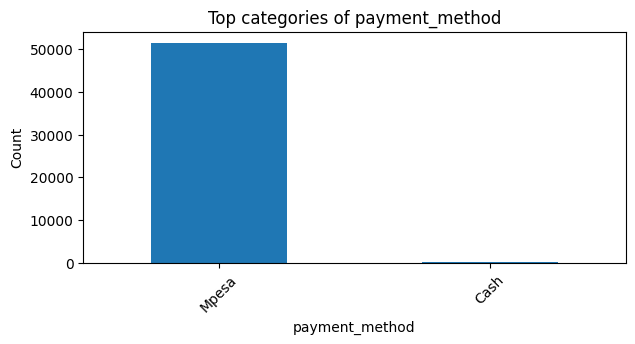

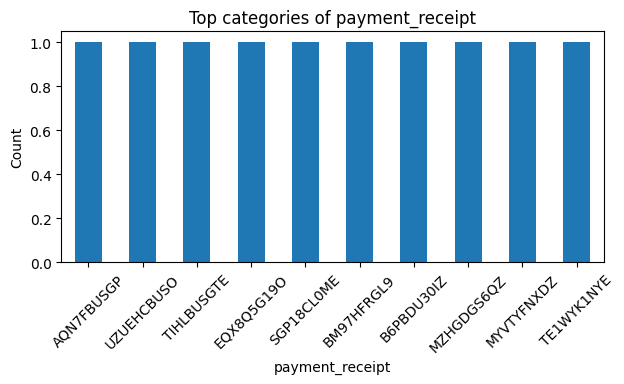

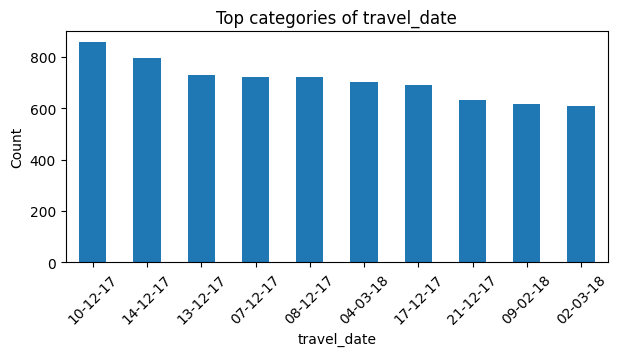

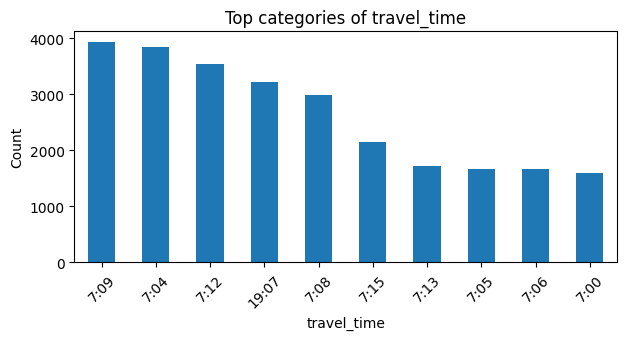

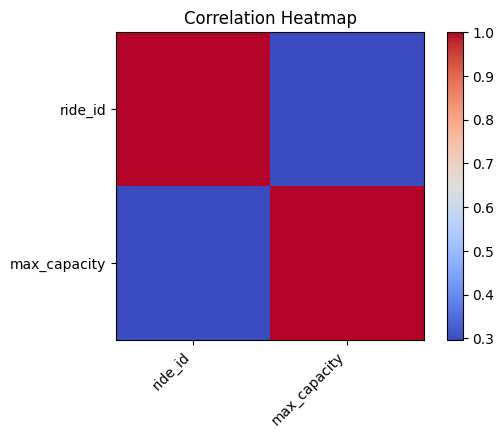


Correlation Matrix


,ride_id,max_capacity
ride_id,1.000000,0.295902
max_capacity,0.295902,1.000000


/tmp/ipython-input-161433967.py:95: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


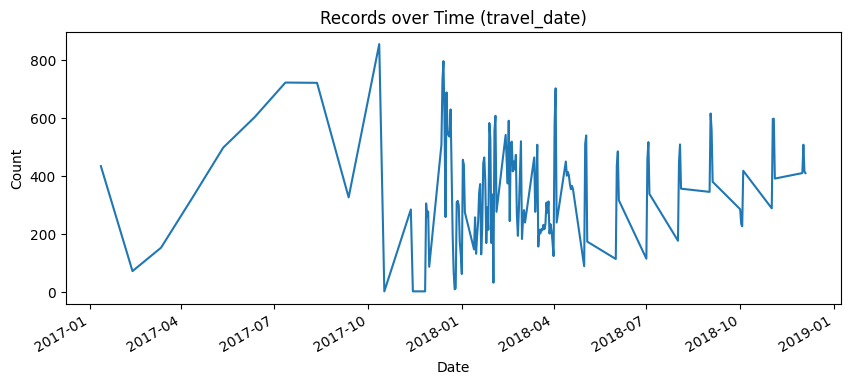


Cleaned dataset


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/train_revised.csv"
df = pd.read_csv(file_path)

#Basic Info
print("Dataset Loaded Successfully")
print("Shape:", df.shape)
print("\nFirst 5 Rows")
display(df.head())

print("\nColumn Data Types")
print(df.dtypes)

#Missing Values
print("\nMissing Values")
missing = df.isnull().sum().sort_values(ascending=False)
print(missing)
print("\nMissing Percentage (%):")
print((missing/len(df))*100)

#Duplicate Rows
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")
df = df.drop_duplicates()

#Numeric and Categorical Columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()
print("\nNumeric Columns:", num_cols)
print("Categorical Columns:", cat_cols)

#Descriptive Statistics
print("\nDescriptive Statistics")
display(df.describe())

#IQR Outlier Detection
print("\nOutlier Detection (IQR Method)")
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

#Histograms for numeric columns
for col in num_cols:
    plt.figure(figsize=(6,3))
    plt.hist(df[col].dropna(), bins=30, edgecolor='k')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#Boxplots for numeric columns
for col in num_cols:
    plt.figure(figsize=(6,2.5))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

#Bar plots for top categories
for col in cat_cols[:5]:  # first 5 categorical columns
    plt.figure(figsize=(7,3))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top categories of {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

#Correlation heatmap
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    plt.figure(figsize=(6,4))
    plt.imshow(corr, cmap='coolwarm', interpolation='none')
    plt.title("Correlation Heatmap")
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation=45, ha='right')
    plt.yticks(range(len(corr)), corr.columns)
    plt.show()
    print("\nCorrelation Matrix")
    display(corr)

#Time-based analysis if date column exists
for col in df.columns:
    if 'date' in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')
        plt.figure(figsize=(10,4))
        df[col].dropna().value_counts().sort_index().plot()
        plt.title(f'Records over Time ({col})')
        plt.xlabel('Date')
        plt.ylabel('Count')
        plt.show()

#Save cleaned dataset
df.to_csv("cleaned_train_revised.csv", index=False)
print("\nCleaned dataset")
files.download("cleaned_train_revised.csv")
